<a href="https://colab.research.google.com/github/madlangbayanjp/Analyzing-Customer-Segmentation-with-K-Means-Clustering-for-Fresh-and-Frozen-Business-Optimization/blob/main/Madlangbayan_Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, I imported all the necessary libraries

In [ ]:
# First, I imported all the necessary libraries
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then I used pandas to read the dataset that is stored in drive

In [ ]:
# Then I used pandas to read the dataset that is stored in drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


I used the regression line to help understand the relationship between Fresh and Frozen

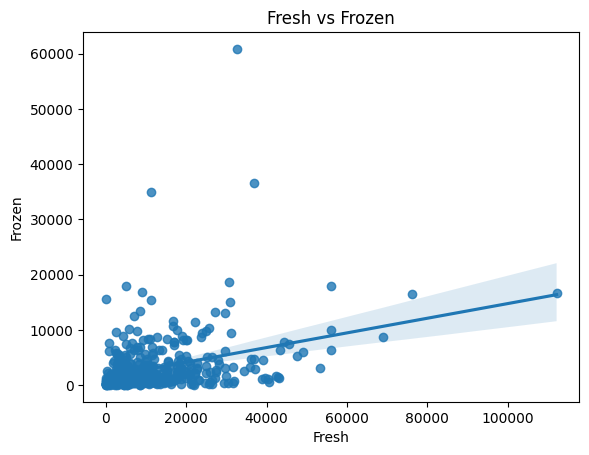

In [ ]:
# I used the regression line to help understand the relationship between Fresh and Frozen
sns.regplot(x='Fresh', y='Frozen', data=df)
plt.title('Fresh vs Frozen')
plt.show()

This is the elbow metod used to determine how many clusters are needed for clustering

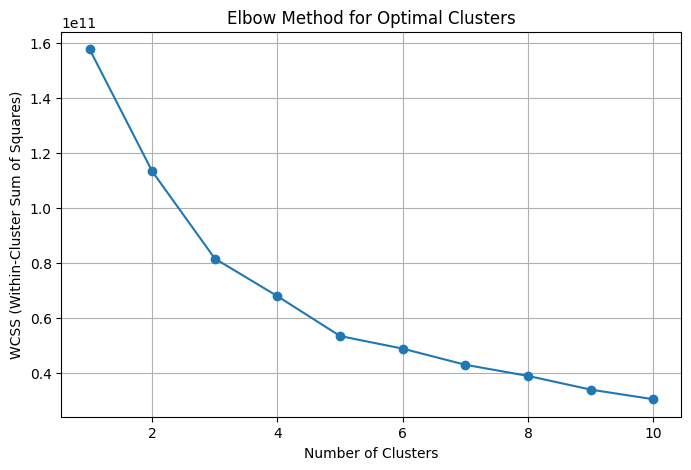

In [ ]:
# This is the elbow metod used to determine how many clusters are needed for clustering
wcss = []
for i in range(1, 11):  # Try 1 to 10 clusters
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

In [ ]:
# I dropped the column Channel and Region because they are not needed for KMeans clustering
df = df.drop('Channel', axis=1)
df = df.drop('Region', axis=1)

In [ ]:
# This is to segment the dataset based on the values of the 'Fresh' and 'Frozen' features into 6 different clusters.
km = KMeans(n_clusters = 6)
y_predicted = km.fit_predict(df[['Fresh', 'Frozen']])
y_predicted

array([0, 2, 2, 0, 3, 0, 0, 0, 2, 2, 2, 0, 3, 3, 3, 0, 2, 2, 3, 0, 0, 2,
       3, 3, 3, 0, 0, 0, 2, 1, 3, 2, 3, 3, 2, 2, 3, 0, 2, 1, 3, 3, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2,
       2, 3, 2, 0, 5, 3, 5, 3, 0, 3, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 3, 1,
       5, 3, 0, 5, 0, 5, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 4, 3, 3, 2, 1, 5, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 3, 3, 1, 5, 3, 3, 0, 0, 2, 3, 0, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 0, 4, 2, 1, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 1, 2,
       0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 2,
       0, 2, 5, 2, 2, 0, 3, 2, 2, 5, 5, 2, 3, 2, 0, 2, 0, 3, 2, 1, 3, 3,
       3, 0, 2, 2, 0, 0, 0, 5, 2, 5, 5, 3, 0, 3, 0, 0, 1, 1, 0, 5, 3, 2,
       2, 5, 2, 3, 0, 0, 2, 2, 2, 1, 2, 2, 3, 5, 0, 0, 2, 0, 1, 3, 4, 1,
       2, 5, 0, 1, 2, 2, 2, 2, 3, 0, 3, 0, 2, 2, 0,

In [ ]:
# This is to move the Frozen column beside the Fresh column for easier and better look
columns = list(df.columns)
columns.insert(columns.index('Fresh') + 1, columns.pop(columns.index('Frozen')))
df = df[columns]

In [ ]:
# I assigned the y_predicted to df['cluster'] so that I can use it for plotting
df['cluster'] = y_predicted
df.head()

,Fresh,Frozen,Milk,Grocery,Detergents_Paper,Delicassen,cluster
0,12669,214,9656,7561,2674,1338,0
1,7057,1762,9810,9568,3293,1776,2
2,6353,2405,8808,7684,3516,7844,2
3,13265,6404,1196,4221,507,1788,0
4,22615,3915,5410,7198,1777,5185,3


Text(0.5, 1.0, 'Fresh vs Frozen')

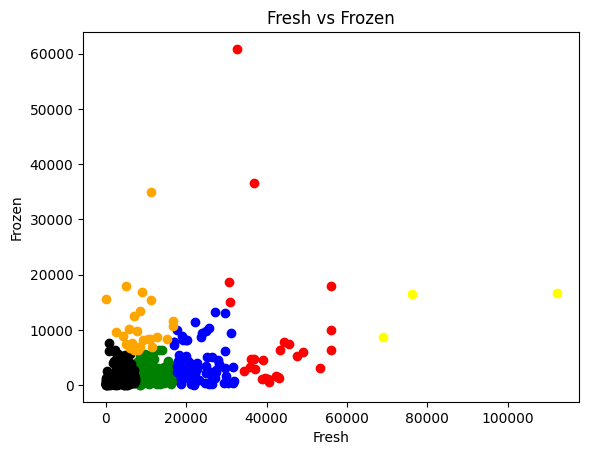

In [ ]:
'''This visualizes the relationship between the 'Fresh' and 'Frozen' features for different clusters in a dataset, using color coding to distinguish
between  the clusters. This allows for an intuitive understanding of how the different clusters are distributed in the feature space.'''

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]
df5 = df[df['cluster'] == 4]
df6 = df[df['cluster'] == 5]

plt.scatter(df1['Fresh'], df1['Frozen'], color = 'green')
plt.scatter(df2['Fresh'], df2['Frozen'], color = 'red')
plt.scatter(df3['Fresh'], df3['Frozen'], color = 'black')
plt.scatter(df4['Fresh'], df4['Frozen'], color = 'blue')
plt.scatter(df5['Fresh'], df5['Frozen'], color = 'yellow')
plt.scatter(df6['Fresh'], df6['Frozen'], color = 'orange')

plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')

In [ ]:
# This scales the 'Fresh' and 'Frozen' columns using standardization and adds the results to the DataFrame for analysis or model training.
scalar = StandardScaler()
scalar.fit(df[['Fresh', 'Frozen']])
df[['Fresh_T', 'Frozen_T']] = scalar.transform(df[['Fresh', 'Frozen']])
df.head()

,Fresh,Frozen,Milk,Grocery,Detergents_Paper,Delicassen,cluster,Fresh_T,Frozen_T
0,12669,214,9656,7561,2674,1338,0,0.052933,-0.589367
1,7057,1762,9810,9568,3293,1776,2,-0.391302,-0.270136
2,6353,2405,8808,7684,3516,7844,2,-0.447029,-0.137536
3,13265,6404,1196,4221,507,1788,0,0.100111,0.687144
4,22615,3915,5410,7198,1777,5185,3,0.840239,0.173859


In [ ]:
# Applying KMeans clustering to group the data based on 'Fresh_T' and 'Frozen_T' values into 6 clusters and storing the cluster.
km = KMeans(n_clusters = 6)
y_predicted = km.fit_predict(df[['Fresh_T', 'Frozen_T']])
y_predicted

array([5, 0, 0, 4, 5, 0, 5, 0, 0, 0, 0, 5, 2, 5, 5, 0, 0, 0, 5, 0, 5, 0,
       2, 2, 5, 5, 5, 5, 0, 2, 5, 0, 5, 2, 0, 0, 2, 5, 0, 1, 4, 5, 5, 0,
       0, 0, 0, 2, 5, 0, 0, 0, 2, 0, 2, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0,
       0, 5, 0, 0, 4, 5, 4, 4, 0, 5, 4, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 2,
       4, 5, 5, 4, 0, 3, 0, 0, 0, 0, 0, 5, 5, 0, 0, 1, 5, 5, 0, 0, 0, 0,
       5, 5, 4, 5, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 2, 1, 4, 5, 0, 2, 4, 0,
       5, 0, 0, 0, 0, 0, 5, 0, 5, 2, 2, 4, 5, 5, 0, 0, 0, 2, 5, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 5, 5, 0, 5, 1, 0, 3, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 4, 4, 0,
       5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0,
       5, 0, 4, 0, 0, 5, 5, 0, 0, 4, 4, 0, 5, 0, 5, 0, 0, 5, 0, 2, 4, 5,
       5, 5, 0, 0, 0, 5, 5, 4, 0, 4, 4, 2, 5, 2, 5, 0, 2, 2, 0, 4, 5, 0,
       0, 4, 0, 5, 5, 5, 0, 0, 0, 2, 0, 0, 2, 4, 4, 5, 0, 5, 2, 4, 1, 2,
       0, 4, 5, 2, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 5,

In [ ]:
# Show the first 5 rows of the scaled and clustered data
df['cluster'] = y_predicted
df.head()

,Fresh,Frozen,Milk,Grocery,Detergents_Paper,Delicassen,cluster,Fresh_T,Frozen_T
0,12669,214,9656,7561,2674,1338,5,0.052933,-0.589367
1,7057,1762,9810,9568,3293,1776,0,-0.391302,-0.270136
2,6353,2405,8808,7684,3516,7844,0,-0.447029,-0.137536
3,13265,6404,1196,4221,507,1788,4,0.100111,0.687144
4,22615,3915,5410,7198,1777,5185,5,0.840239,0.173859


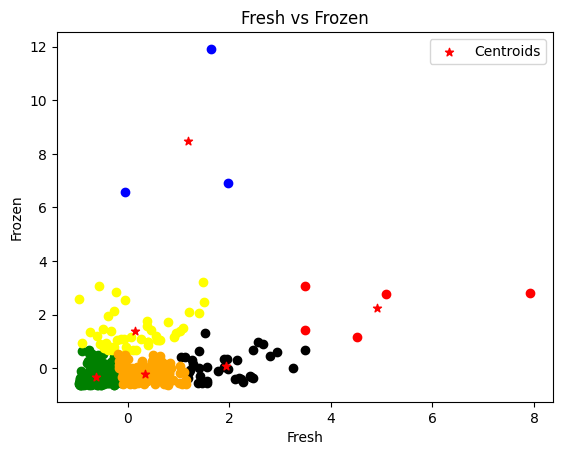

In [ ]:
'''This is focused on performing clustering, and segmenting it into different groups based on the clusters,
visualizing the relationship between two features(Fresh_T and Frozen_T). '''
km.cluster_centers_

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]
df5 = df[df['cluster'] == 4]
df6 = df[df['cluster'] == 5]

plt.scatter(df1['Fresh_T'], df1['Frozen_T'], color = 'green')
plt.scatter(df2['Fresh_T'], df2['Frozen_T'], color = 'red')
plt.scatter(df3['Fresh_T'], df3['Frozen_T'], color = 'black')
plt.scatter(df4['Fresh_T'], df4['Frozen_T'], color = 'blue')
plt.scatter(df5['Fresh_T'], df5['Frozen_T'], color = 'yellow')
plt.scatter(df6['Fresh_T'], df6['Frozen_T'], color = 'orange')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*', label='Centroids')

plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.legend()
plt.show()

In [ ]:
'''This extracts cluster center positions from a k-means model, assigns descriptive names to clusters in the DataFrame,
and displays a preview of a subset of the data.'''
km.cluster_centers_

df['cluster_name'] = df['cluster'].map({0:'Fresh', 1:'Frozen'})
df.iloc[:, :2].head()

,Fresh,Frozen
0,12669,214
1,7057,1762
2,6353,2405
3,13265,6404
4,22615,3915


In [ ]:
# counts how many times each unique cluster appears in the 'cluster_name' column
count = df['cluster_name'].value_counts()
count

,count
cluster_name,
Fresh,232
Frozen,5
